# Learning Algorithm
For solving the Collaboration and Competition version of the Tennis environment, I decided to use the MADDPG algorithm. As part of the MADDPG implementation, I made use of:

 1. Priority Experience Replay ( Replay Buffer)
 2. Actor Critic models
 3. Soft update using local and target networks and controlling using hyperparameter TAU

# Hyperparameters
I experiaemented with following Hyperparameters in various runs and solved the environment using the values shown below:

 1. BATCH_SIZE = 1024 ( Size of the batch used for sampling)
 2. BUFFER_SIZE = 1e5 ( Replay buffer size aka memory size )
 3. TAU  = 0.1 ( To control how much the target network should be updated using the local network)
 4. GAMMA = 0.99 ( discount factor )
 5. ACTOR_LR = 1e-3 ( Learning rate used for actor model )
 6. CRITIC_LR = 1e-3 ( Learning rate used for critic model )
 7. UPDATE_EVERY = 100 (How frequent do we want to learn i.e at every UPDATE_EVERY steps)
 8. LEARN_TIMES = 1 ( how many times should we perform learning during every UPDATE_EVERY steps)

# Model Architecture
My solution uses Actor Critic models to implement MADDPG. As with any MADDPG algorithm, the local actor critic models have their respective copy i.e target models. 

1. Actor Model - My actor model is made up of 3 fully connected layers ( 48x256, 256x512, 512 x action_size ). The activation function in the final output layer is tanh, as we need our action values to be between -1 and 1. The other two layers use relu activation functions. 

2. Critic model - My critic model is again made up of 3 fully connected layers ( 48x256, 256+(action_size*2)x512, 512x1). The last layer does not have any activation function. The other 2 layers use relu activation function. 

# Implementation

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


ERROR:wandb.jupyter:Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable
wandb: Wandb version 0.10.12 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
Episode:0, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.0
Episode:1, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.05000000074505806
Episode:2, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.033333333830038704
Episode:3, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.02500000037252903
Episode:4, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.020000000298023225
Episode:5, Total score (averaged over agents)

Episode:71, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.015277778005434407
Episode:72, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.015068493375222976
Episode:73, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.014864865086368612
Episode:74, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.014666666885217032
Episode:75, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.014473684426201018
Episode:76, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.014285714498588018
Episode:77, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.014102564312708683
Episode:78, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.013924050840395915
Episode:79, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.013750000204890967
Episode:80

Episode:147, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.010000000149011612
Episode:148, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.010000000149011612
Episode:149, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.010000000149011612
Episode:150, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.009000000134110451
Episode:151, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.009000000134110451
Episode:152, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.009000000134110451
Episode:153, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.009000000134110451
Episode:154, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.009000000134110451
Episode:155, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.009000000134110451
E

Episode:222, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.005000000074505806
Episode:223, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.005000000074505806
Episode:224, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.005000000074505806
Episode:225, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.005000000074505806
Episode:226, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.005000000074505806
Episode:227, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.005000000074505806
Episode:228, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.006000000089406967
Episode:229, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.006000000089406967
Episode:230, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 

Episode:296, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.010000000149011612
Episode:297, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.009000000134110451
Episode:298, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.009000000134110451
Episode:299, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.009000000134110451
Episode:300, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.009000000134110451
Episode:301, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.009000000134110451
Episode:302, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.009000000134110451
Episode:303, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.009000000134110451
Episode:304, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.009000000134110451
E

Episode:373, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.00800000011920929
Episode:374, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.00800000011920929
Episode:375, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.00800000011920929
Episode:376, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.00800000011920929
Episode:377, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.00800000011920929
Episode:378, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.00800000011920929
Episode:379, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.00800000011920929
Episode:380, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.00800000011920929
Episode:381, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.00800000011920929
Episode:38

Episode:448, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.01190000019967556
Episode:449, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.01190000019967556
Episode:450, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.01190000019967556
Episode:451, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.01190000019967556
Episode:452, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.01190000019967556
Episode:453, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.01190000019967556
Episode:454, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.01190000019967556
Episode:455, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.01190000019967556
Episode:456, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.011900000199

/home/ubuntu/machine-learning/DRLND/collaboration/ddpg/agent.py:118: UserWarning: Using a target size (torch.Size([128, 2])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  Qloss = F.mse_loss(Qval,Qnext)


Episode:501, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.009900000169873238
Episode:502, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.009900000169873238
Episode:503, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.008900000154972077
Episode:504, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.007900000140070916
Episode:505, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.007900000140070916
Episode:506, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.007900000140070916
Episode:507, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.007900000140070916
Episode:508, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.007000000104308128
Episode:509, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.007000000104308128
E

Episode:574, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.01600000023841858
Episode:575, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.015000000223517418
Episode:576, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.015000000223517418
Episode:577, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.015000000223517418
Episode:578, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.015000000223517418
Episode:579, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.015000000223517418
Episode:580, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.015000000223517418
Episode:581, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.015000000223517418
Episode:582, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.014000000208616257
Ep

Episode:646, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.02600000038743019
Episode:647, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.02600000038743019
Episode:648, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.02600000038743019
Episode:649, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.02600000038743019
Episode:650, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.02600000038743019
Episode:651, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.027000000402331352
Episode:652, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.028000000417232513
Episode:653, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.028000000417232513
Episode:654, Total score (averaged over agents) this episode: 0.0, Avg over 100 episo

Episode:718, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.031000000461935996
Episode:719, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.03200000047683716
Episode:720, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.031000000461935996
Episode:721, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.031000000461935996
Episode:722, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.03200000047683716
Episode:723, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.03300000049173832
Episode:724, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.03300000049173832
Episode:725, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.03300000049173832
Episode:726, Total score (averaged over agents) this episode: 0.0, Av

Episode:791, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.020000000298023225
Episode:792, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.020000000298023225
Episode:793, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.020000000298023225
Episode:794, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.020000000298023225
Episode:795, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.018000000268220902
Episode:796, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.01700000025331974
Episode:797, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.01600000023841858
Episode:798, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.01600000023841858
Episode:799, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.01600000023841858
Episo

Episode:863, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.031000000461935996
Episode:864, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.029000000432133674
Episode:865, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.029000000432133674
Episode:866, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.029000000432133674
Episode:867, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.029000000432133674
Episode:868, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.029000000432133674
Episode:869, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.029000000432133674
Episode:870, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.029000000432133674
Episode:871, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.029000000432133674
E

Episode:936, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.019000000283122064
Episode:937, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.019000000283122064
Episode:938, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.020000000298023225
Episode:939, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.020000000298023225
Episode:940, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.020000000298023225
Episode:941, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.020000000298023225
Episode:942, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.018000000268220902
Episode:943, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.018000000268220902
Episode:944, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.0180

Episode:1009, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.018000000268220902
Episode:1010, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.018000000268220902
Episode:1011, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.018000000268220902
Episode:1012, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.018000000268220902
Episode:1013, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.018000000268220902
Episode:1014, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.018000000268220902
Episode:1015, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.018000000268220902
Episode:1016, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.018000000268220902
Episode:1017, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.01800000026

Episode:1081, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.031000000461935996
Episode:1082, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.03200000047683716
Episode:1083, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.03300000049173832
Episode:1084, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.03300000049173832
Episode:1085, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.03300000049173832
Episode:1086, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.03300000049173832
Episode:1087, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.03400000050663948
Episode:1088, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.03400000050663948
Episode:1089, Total score (aver

Episode:1151, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.05000000074505806
Episode:1152, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.046000000685453415
Episode:1153, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.046000000685453415
Episode:1154, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.04500000067055225
Episode:1155, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.04500000067055225
Episode:1156, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.04500000067055225
Episode:1157, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.04500000067055225
Episode:1158, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.04500000067055225
Episode:1159, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.0

Episode:1222, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.03800000056624413
Episode:1223, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.03800000056624413
Episode:1224, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.039000000581145285
Episode:1225, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.04000000059604645
Episode:1226, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.04100000061094761
Episode:1227, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.04000000059604645
Episode:1228, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.04000000059604645
Episode:1229, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.04100000061094761
Episode:1230, Total score (aver

Episode:1291, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.04500000067055225
Episode:1292, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.046000000685453415
Episode:1293, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.046000000685453415
Episode:1294, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.04700000070035457
Episode:1295, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.04800000071525574
Episode:1296, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.049000000730156895
Episode:1297, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.049000000730156895
Episode:1298, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.05000000074505

Episode:1360, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.06400000095367432
Episode:1361, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.06200000092387199
Episode:1362, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.061000000908970835
Episode:1363, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.061000000908970835
Episode:1364, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.061000000908970835
Episode:1365, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.061000000908970835
Episode:1366, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.061000000908970835
Episode:1367, Total score (averaged over agents) this episode: 0.20000000298023224, Avg over 100 episodes: 0.06200000092387199
Episode:1368, Total score (

Episode:1428, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.06600000098347664
Episode:1429, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.0670000009983778
Episode:1430, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.06800000101327897
Episode:1431, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.06900000102818012
Episode:1432, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.07000000104308128
Episode:1433, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.07000000104308128
Episode:1434, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.07100000105798245
Episode:1435, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.072

Episode:1490, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.11100000165402889
Episode:1491, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.11000000163912774
Episode:1492, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.10900000162422657
Episode:1493, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.10900000162422657
Episode:1494, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.10800000160932541
Episode:1495, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.10700000159442424
Episode:1496, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.10800000160932541
Episode:1497, Total score (averaged over agents) this episode: 0.20000000298023224, Avg over 100 episodes: 0.10900000162422657
Episode:1498, Total score (averaged over agents)

Episode:1553, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.1260000018775463
Episode:1554, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.12500000186264515
Episode:1555, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.11900000177323818
Episode:1556, Total score (averaged over agents) this episode: 0.4000000059604645, Avg over 100 episodes: 0.12200000181794167
Episode:1557, Total score (averaged over agents) this episode: 0.20000000298023224, Avg over 100 episodes: 0.12400000184774398
Episode:1558, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.12300000183284282
Episode:1559, Total score (averaged over agents) this episode: 0.20000000298023224, Avg over 100 episodes: 0.12500000186264515
Episode:1560, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.12200000181794167
Episode:1561, Total score (averaged over agents) this episode: 0.0

Episode:1609, Total score (averaged over agents) this episode: 0.9000000134110451, Avg over 100 episodes: 0.2190000032633543
Best avg_score_100_episodes seen in Episode:1609
Episode:1610, Total score (averaged over agents) this episode: 0.7000000104308128, Avg over 100 episodes: 0.22500000335276127
Best avg_score_100_episodes seen in Episode:1610
Episode:1611, Total score (averaged over agents) this episode: 0.4000000059604645, Avg over 100 episodes: 0.22800000339746476
Best avg_score_100_episodes seen in Episode:1611
Episode:1612, Total score (averaged over agents) this episode: 0.20000000298023224, Avg over 100 episodes: 0.23000000342726706
Best avg_score_100_episodes seen in Episode:1612
Episode:1613, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.23100000344216823
Best avg_score_100_episodes seen in Episode:1613
Episode:1614, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.231000003442168

Episode:1663, Total score (averaged over agents) this episode: 0.7000000104308128, Avg over 100 episodes: 0.42400000631809237
Episode:1664, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.4250000063329935
Episode:1665, Total score (averaged over agents) this episode: 2.1000000312924385, Avg over 100 episodes: 0.44500000663101674
Best avg_score_100_episodes seen in Episode:1665
Episode:1666, Total score (averaged over agents) this episode: 0.0, Avg over 100 episodes: 0.4430000066012144
Episode:1667, Total score (averaged over agents) this episode: 0.4000000059604645, Avg over 100 episodes: 0.44700000666081907
Best avg_score_100_episodes seen in Episode:1667
Episode:1668, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.4480000066757202
Best avg_score_100_episodes seen in Episode:1668
Episode:1669, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.4480

Episode:1727, Total score (averaged over agents) this episode: 0.30000000447034836, Avg over 100 episodes: 0.40490000605583193
Episode:1728, Total score (averaged over agents) this episode: 2.0000000298023224, Avg over 100 episodes: 0.42390000633895397
Episode:1729, Total score (averaged over agents) this episode: 0.9000000134110451, Avg over 100 episodes: 0.42990000642836096
Episode:1730, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.4249000063538551
Episode:1731, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.4249000063538551
Episode:1732, Total score (averaged over agents) this episode: 0.6000000089406967, Avg over 100 episodes: 0.42890000641345977
Episode:1733, Total score (averaged over agents) this episode: 0.10000000149011612, Avg over 100 episodes: 0.42890000641345977
Episode:1734, Total score (averaged over agents) this episode: 0.30000000447034836, Avg over 100 episodes: 0.4319000

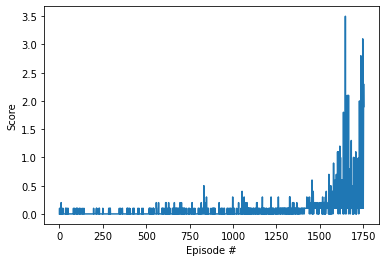

In [1]:
from solution import CollaborationSolution
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#env = UnityEnvironment(file_name="./Tennis_Windows_x86_64/Tennis.exe")
env = UnityEnvironment(file_name="./Tennis_Linux_NoVis/Tennis.x86_64")

try:
    sol = CollaborationSolution(env,enable_wandb=True)
    scores = sol.train(num_episodes=5000)
    if scores:
        # plot the scores
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.plot(np.arange(len(scores)), scores)
        plt.ylabel('Score')
        plt.xlabel('Episode #')
        plt.show()
finally:
    env.close()


# Graphs
Here are few more graphs showing the learning scores per episode and average score for 100 episodes

![Learning graph](./images/learning-graph.jpg)



# Try the trained model

In [ ]:
from solution import CollaborationSolution
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="./Tennis_Windows_x86_64/Tennis.exe")

try:
    sol = CollaborationSolution(env,enable_wandb=False)
    sol.watch_trained('./checkpoints/checkpoint-solved')
finally:
    env.close()


# Video of the trained model
%%HTML
<div align="middle">
      <video width="80%" controls>
            <source src="./video.mp4" type="video/mp4">
      </video>
</div>

# Ideas for future Work
This project was a tricky one. It look me many tries to figure out Multi Agent setup for DDPG. The learning process also currently requires 5+ learnings per episode. This is slowing down the learning. 

The learning was also not statble at times. Few things for next improvements:

1. The MADDPG paper talks about few improvements to MADDPG like using Policy Ensembles and Inferring policies of other Agents. I will like to explore these further. 
2. I will like to try out other algorithms like TRPO in MA to solve this environment. 